# Estimativa de Valor Médio

In [20]:
import pandas as pd
import numpy as np
import seaborn as sb

dados = pd.read_csv('Data/Processed/retail/bigTableWines.csv')
dados.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo Vinho
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red


### Qual é o Índice médio do açucar residual?

In [7]:
n = 200
coluna = 'residual sugar'
print('Açucar residual médio: %.2f'%dados[coluna].mean())
print('\t1)Valor médio amostral (',n,'): %.2f'%dados.sample(n)[coluna].mean())
print('\t2)Valor médio amostral (',n,'): %.2f'%dados.sample(n)[coluna].mean())
print('\t3)Valor médio amostral (',n,'): %.2f'%dados.sample(n)[coluna].mean())

Açucar residual médio: 5.44
	1)Valor médio amostral ( 200 ): 5.55
	2)Valor médio amostral ( 200 ): 4.79
	3)Valor médio amostral ( 200 ): 4.84


### Calculando a distribuição do valor médio da população para diversos sorteios de amostras.

Valor médio da amostra  :  5.44064495
Valor médio da população:  5.4432353393874156
Erro padrão da amostra  :  0.32865596727733004
Erro padrão estimado    :  0.3364275290334297


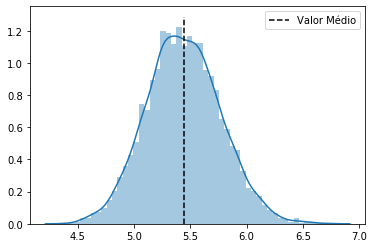

In [21]:
means = []
for x in range(10000):
    means.append(dados.sample(n)[coluna].mean())

means = np.array(means)

print('Valor médio da amostra  : ', means.mean())
print('Valor médio da população: ', dados[coluna].mean())
print('Erro padrão da amostra  : ', means.std(0))
print('Erro padrão estimado    : ', dados[coluna].std() / np.sqrt(n))

ax = sb.distplot(means)
ax.plot([dados[coluna].mean(), dados[coluna].mean()], ax.axis()[2:], '--k', label='Valor Médio')
ax.legend()

### Visualizando o impacto do tamanho da amostra para a estimativa do valor médio.

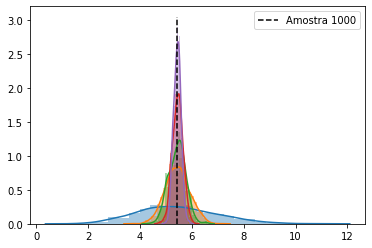

In [23]:
for tamanhoAmostra in [10, 100, 200, 500, 1000]:
    means = []
    for i in range(1000):
        means.append(dados.sample(tamanhoAmostra)[coluna].mean())
        
    ax = sb.distplot(means)
ax.plot([dados[coluna].mean(), dados[coluna].mean()], ax.axis()[2:], '--k', label='Amostra %i'%tamanhoAmostra)
ax.legend()

### Visualizando o impacto da quantidade de testes para a estimativa do valor médio da população.

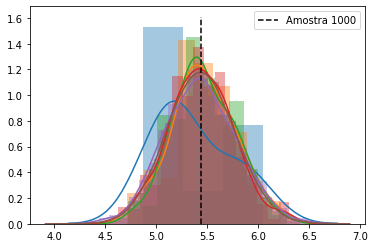

In [24]:
for qtdTestes in [10, 100, 200, 500, 1000, 10000]:
    means = []
    for i in range(qtdTestes):
        means.append(dados.sample(n)[coluna].mean())
        
    ax = sb.distplot(means)
ax.plot([dados[coluna].mean(), dados[coluna].mean()], ax.axis()[2:], '--k', label='Amostra %i'%tamanhoAmostra)
ax.legend()